Best platform based on IMDb scores: Prime Video
Best platform based on Rotten Tomatoes scores: Netflix


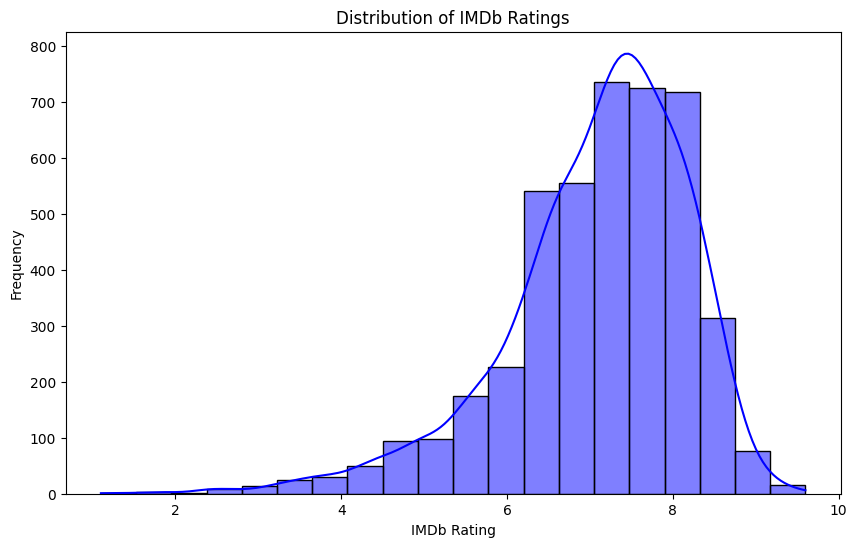

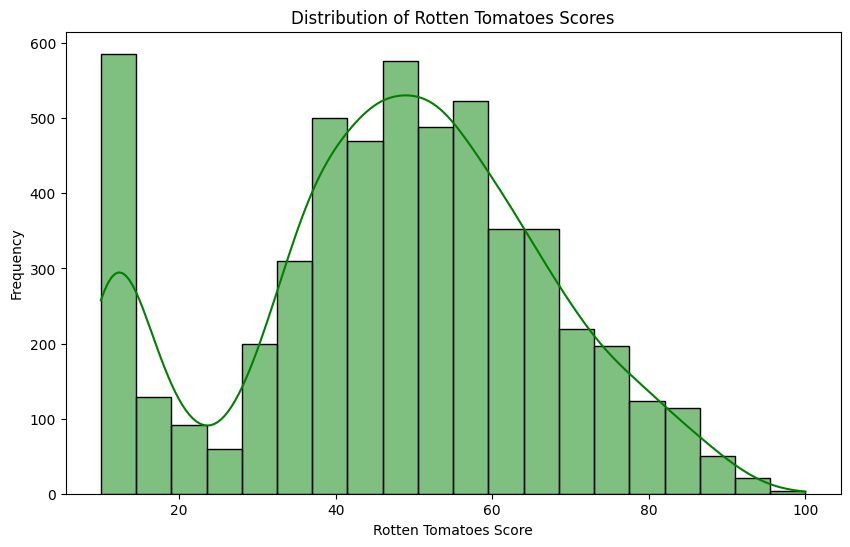

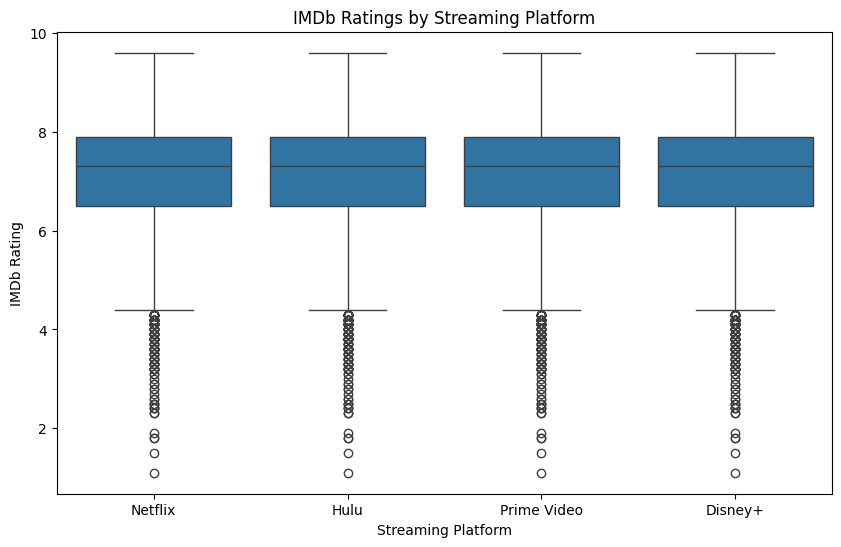

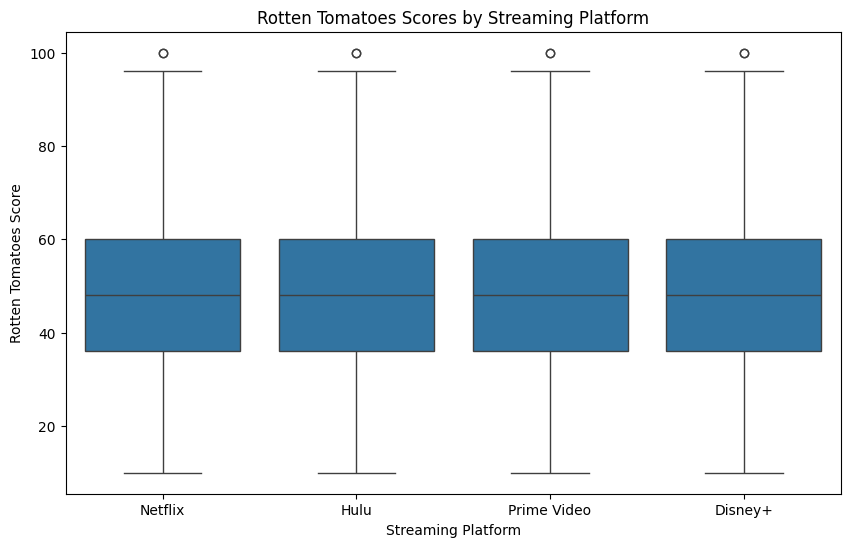

<Figure size 1000x600 with 0 Axes>

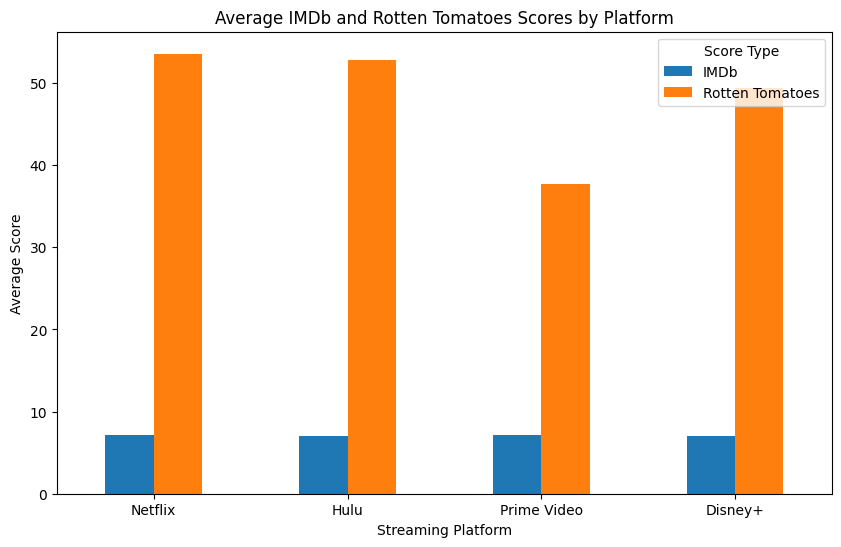

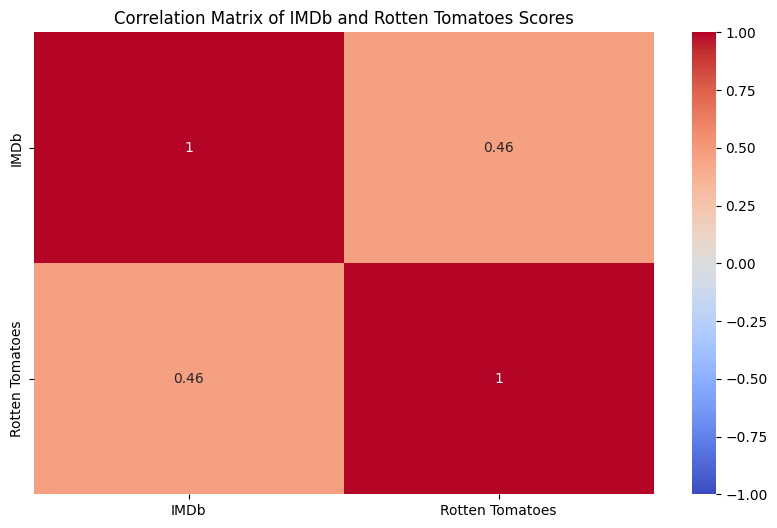

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Data
file_path = 'tv_shows.csv'
df = pd.read_csv(file_path)

# Step 2: Data Cleaning
# Convert IMDb and Rotten Tomatoes scores to numeric values
df['IMDb'] = df['IMDb'].str.replace('/10', '').astype(float)
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.replace('/100', '').astype(float)

# Step 3: Data Aggregation
# Calculate the average IMDb and Rotten Tomatoes scores for each platform
platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
platform_scores = {}

for platform in platforms:
    platform_df = df[df[platform] == 1]
    avg_imdb = platform_df['IMDb'].mean()
    avg_rt = platform_df['Rotten Tomatoes'].mean()
    platform_scores[platform] = {'IMDb': avg_imdb, 'Rotten Tomatoes': avg_rt}

# Convert the dictionary to a DataFrame for easier manipulation
platform_scores_df = pd.DataFrame(platform_scores).T

# Step 4: Analysis
# Determine the best platform based on the average scores
best_platform_imdb = platform_scores_df['IMDb'].idxmax()
best_platform_rt = platform_scores_df['Rotten Tomatoes'].idxmax()

print(f"Best platform based on IMDb scores: {best_platform_imdb}")
print(f"Best platform based on Rotten Tomatoes scores: {best_platform_rt}")

# Step 5: Visualization

# Distribution of IMDb Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDb'], bins=20, kde=True, color='blue')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

# Distribution of Rotten Tomatoes Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Rotten Tomatoes'], bins=20, kde=True, color='green')
plt.title('Distribution of Rotten Tomatoes Scores')
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Frequency')
plt.show()

# Box Plot of IMDb Ratings by Streaming Platform
plt.figure(figsize=(10, 6))
sns.boxplot(x='StreamingOn', y='IMDb', data=df.melt(id_vars=['Title', 'IMDb'], value_vars=['Netflix', 'Hulu', 'Prime Video', 'Disney+'], var_name='StreamingOn', value_name='Available'))
plt.title('IMDb Ratings by Streaming Platform')
plt.xlabel('Streaming Platform')
plt.ylabel('IMDb Rating')
plt.show()

# Box Plot of Rotten Tomatoes Scores by Streaming Platform
plt.figure(figsize=(10, 6))
sns.boxplot(x='StreamingOn', y='Rotten Tomatoes', data=df.melt(id_vars=['Title', 'Rotten Tomatoes'], value_vars=['Netflix', 'Hulu', 'Prime Video', 'Disney+'], var_name='StreamingOn', value_name='Available'))
plt.title('Rotten Tomatoes Scores by Streaming Platform')
plt.xlabel('Streaming Platform')
plt.ylabel('Rotten Tomatoes Score')
plt.show()

# Step 6: Additional Analysis

# Average IMDb and Rotten Tomatoes Scores by Platform
plt.figure(figsize=(10, 6))
platform_scores_df.plot(kind='bar', figsize=(10, 6))
plt.title('Average IMDb and Rotten Tomatoes Scores by Platform')
plt.ylabel('Average Score')
plt.xlabel('Streaming Platform')
plt.xticks(rotation=0)
plt.legend(title='Score Type')
plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 6))
corr_matrix = df[['IMDb', 'Rotten Tomatoes']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of IMDb and Rotten Tomatoes Scores')
plt.show()

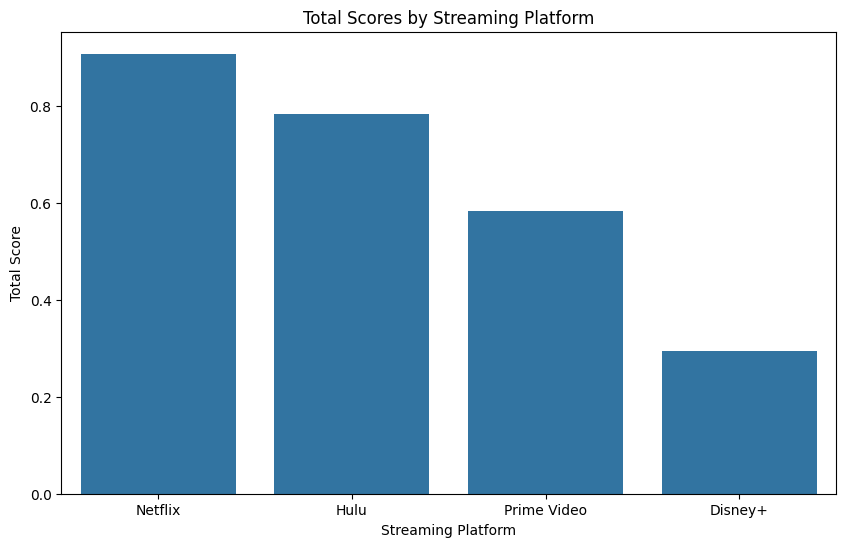

                 IMDb  Rotten Tomatoes  Number of Titles  Total Score  Rank
Netflix      0.770681         1.000000          1.000000     0.908272   1.0
Hulu         0.613241         0.954338          0.783951     0.783822   2.0
Prime Video  1.000000         0.000000          0.913580     0.582716   3.0
Disney+      0.000000         0.738279          0.000000     0.295312   4.0


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the Data
file_path = 'tv_shows.csv'
df = pd.read_csv(file_path)

# Step 2: Data Cleaning
# Convert IMDb and Rotten Tomatoes scores to numeric values
df['IMDb'] = df['IMDb'].str.replace('/10', '').astype(float)
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.replace('/100', '').astype(float)

# Step 3: Data Aggregation
# Calculate the average IMDb and Rotten Tomatoes scores, and number of titles for each platform
platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
platform_scores = {}

for platform in platforms:
    platform_df = df[df[platform] == 1]
    avg_imdb = platform_df['IMDb'].mean()
    avg_rt = platform_df['Rotten Tomatoes'].mean()
    num_titles = platform_df.shape[0]
    platform_scores[platform] = {
        'IMDb': avg_imdb,
        'Rotten Tomatoes': avg_rt,
        'Number of Titles': num_titles
    }

# Convert the dictionary to a DataFrame for easier manipulation
platform_scores_df = pd.DataFrame(platform_scores).T

# Step 4: Normalization
scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(platform_scores_df)
normalized_scores_df = pd.DataFrame(normalized_scores, columns=platform_scores_df.columns, index=platform_scores_df.index)

# Step 5: Scoring
# Assign weights to each factor (customize as needed)
weights = {
    'IMDb': 0.4,
    'Rotten Tomatoes': 0.4,
    'Number of Titles': 0.2
}

# Calculate the total score for each platform
normalized_scores_df['Total Score'] = (
    normalized_scores_df['IMDb'] * weights['IMDb'] +
    normalized_scores_df['Rotten Tomatoes'] * weights['Rotten Tomatoes'] +
    normalized_scores_df['Number of Titles'] * weights['Number of Titles']
)

# Step 6: Ranking
normalized_scores_df['Rank'] = normalized_scores_df['Total Score'].rank(ascending=False)

# Step 7: Visualization
# Plot the total scores
plt.figure(figsize=(10, 6))
sns.barplot(x=normalized_scores_df.index, y=normalized_scores_df['Total Score'])
plt.title('Total Scores by Streaming Platform')
plt.ylabel('Total Score')
plt.xlabel('Streaming Platform')
plt.show()

# Print the ranking
print(normalized_scores_df.sort_values(by='Rank'))